In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MultiLabelBinarizer

In [2]:
articles = pd.read_csv('../data/arxiv_math.csv')

In [3]:
def get_math_categories(categories):
    import ast
    return [x[5:] for x in ast.literal_eval(categories) if x[:5] == 'math.']

In [6]:
articles['math_categories'] = articles.categories.apply(get_math_categories)

In [8]:
mlb = MultiLabelBinarizer()

In [14]:
articles = pd.concat([articles,pd.DataFrame(mlb.fit_transform(articles.math_categories),columns=mlb.classes_, index=articles.index)], axis = 1)

In [17]:
articles.columns.values

array(['abstract', 'categories', 'created', 'doi', 'id', 'title',
       'math_categories', 'AC', 'AG', 'AP', 'AT', 'CA', 'CO', 'CT', 'CV',
       'DG', 'DS', 'FA', 'GM', 'GN', 'GR', 'GT', 'HO', 'IT', 'KT', 'LO',
       'MG', 'MP', 'NA', 'NT', 'OA', 'OC', 'PR', 'QA', 'RA', 'RT', 'SG',
       'SP', 'ST'], dtype=object)

In [29]:
category_lookup = {
                'AG' : 'Algebraic Geometry',
                'AT' : 'Algebraic Topology',
                'AP' : 'Analysis of PDEs',
                'CT' : 'Category Theory',
                'CA' : 'Classical Analysis and ODEs',
                'CO' : 'Combinatorics',
                'AC' : 'Commutative Algebra',
                'CV' : 'Complex Variables',
                'DG' : 'Differential Geometry',
                'DS' : 'Dynamical Systems',
                'FA' : 'Functional Analysis',
                'GM' : 'General Mathematics',
                'GN' : 'General Topology',
                'GT' : 'Geometric Topology',
                'GR' : 'Group Theory',
                'HO' : 'History and Overview',
                'IT' : 'Information Theory',
                'KT' : 'K-Theory and Homology',
                'LO' : 'Logic',
                'MP' : 'Mathematical Physics',
                'MG' : 'Metric Geometry',
                'NT' : 'Number Theory',
                'NA' : 'Numerical Analysis',
                'OA' : 'Operator Algebras',
                'OC' : 'Optimization and Control',
                'PR' : 'Probability',
                'QA' : 'Quantum Algebra',
                'RT' : 'Representation Theory',
                'RA' : 'Rings and Algebras',
                'SP' : 'Spectral Theory',
                'ST' : 'Statistics Theory',
                'SG' : 'Symplectic Geometry'}

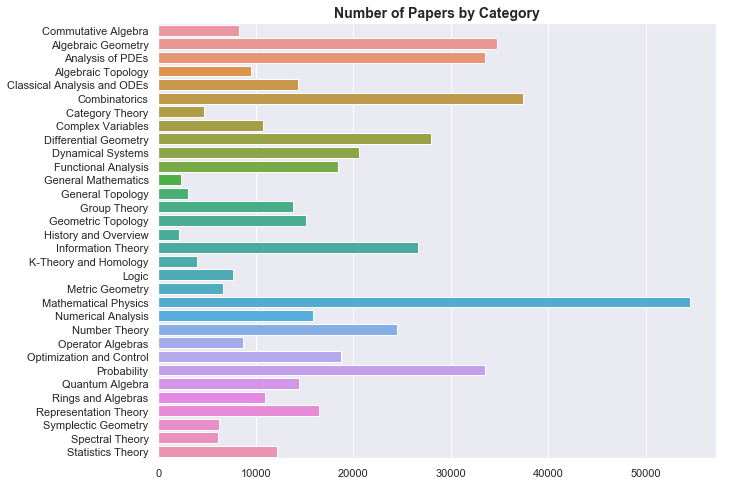

In [39]:
sns.set(font_scale = 1)
plt.figure(figsize=(10,8))

categories = list(articles.columns.values)
ax= sns.barplot(articles.iloc[:,-32:].sum().values, categories[-32:])
ax.set_title('Number of Papers by Category', fontsize = 14, fontweight = 'bold')
ax.set(yticklabels=[category_lookup[x] for x in categories[-32:]]);

In [43]:
articles['year'] = articles.created.str[:4].astype(int)

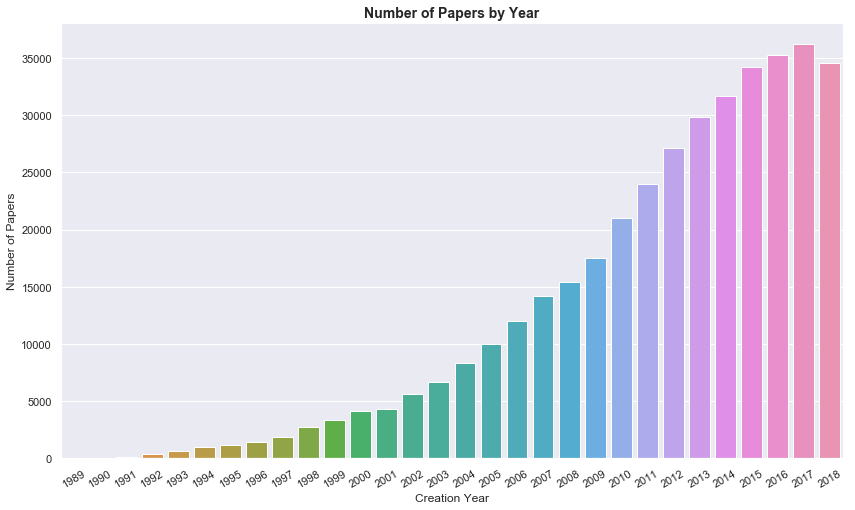

In [64]:
sns.set(font_scale = 1)
plt.figure(figsize=(14,8))

ax = sns.barplot(x = 'year', y = 'title', data = articles.groupby('year').title.count().reset_index())
ax.set_xticklabels(ax.get_xticklabels(),rotation=30)
ax.set_title('Number of Papers by Year', fontsize = 14, fontweight = 'bold')
ax.set_ylabel('Number of Papers')
ax.set_xlabel('Creation Year');

In [89]:
rowSums = articles.iloc[:,-33:-1].sum(axis=1)
multiLabel_counts = rowSums.value_counts()
multiLabel_counts = multiLabel_counts.iloc[:]

In [90]:
multiLabel_counts = multiLabel_counts.loc[1:8]

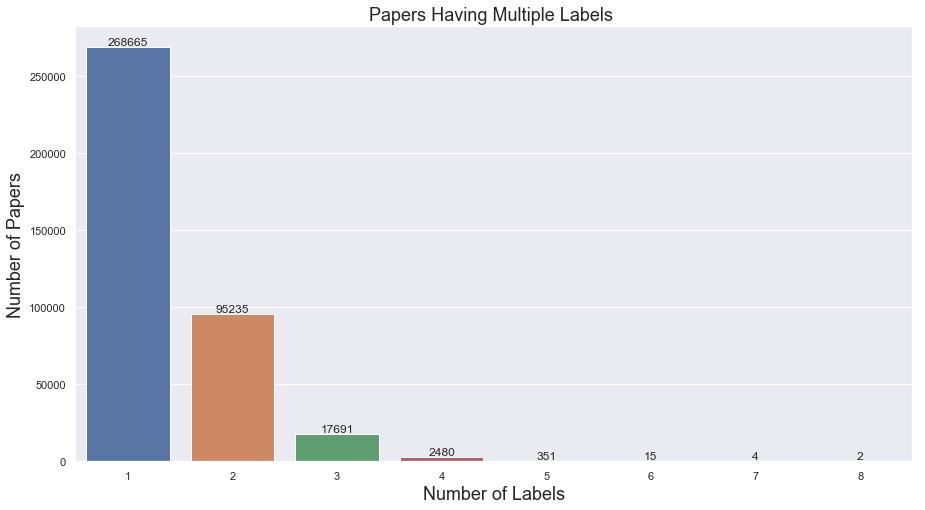

In [92]:
plt.figure(figsize=(15,8))

ax = sns.barplot(multiLabel_counts.index, multiLabel_counts.values)

plt.title("Papers Having Multiple Labels ", fontsize = 18)
plt.ylabel('Number of Papers', fontsize=18)
plt.xlabel('Number of Labels', fontsize=18)

#adding the text labels
rects = ax.patches
labels = multiLabel_counts.values
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha='center', va='bottom')

In [105]:
articles.loc[articles[''] == 1].iloc[:,-33:-1]

,AC,AG,AP,AT,CA,CO,CT,CV,DG,DS,...,NT,OA,OC,PR,QA,RA,RT,SG,SP,ST
19,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
66,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
123,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
126,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
268,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
280,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
285,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
325,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,1,0,0,0,0,0
330,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
353,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0


In [110]:
by_category = pd.DataFrame()
for category in list(articles.iloc[:,-33:-1].columns):
    temp = articles.loc[articles[category] == 1].iloc[:,-33:-1]
    temp['category'] = category
    by_category = by_category.append(temp, ignore_index=True)

In [113]:
by_category = by_category.groupby('category').sum()

In [118]:
mask = np.zeros_like(by_category)
mask[np.triu_indices_from(mask)] = True

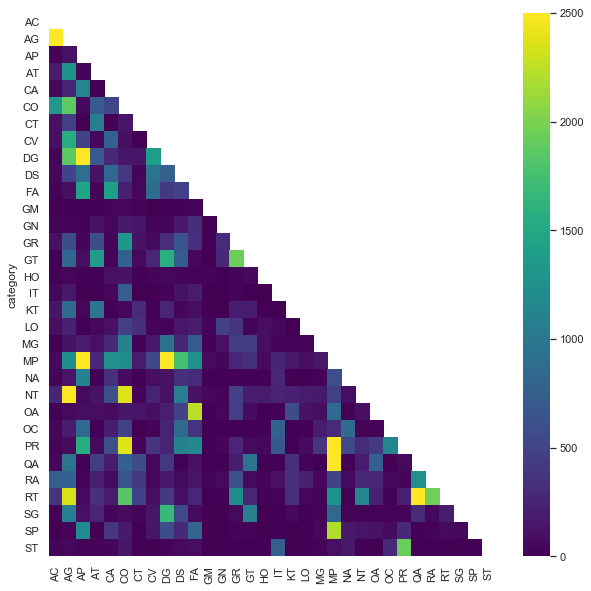

In [135]:
# Don't know how useful this is
plt.figure(figsize=(10,10))
with sns.axes_style("white"):
    sns.heatmap(by_category, mask=mask, vmin = 0, vmax = 2500, cmap = 'viridis')

In [137]:
articles['num_categories'] = articles.iloc[:,-33:-1].sum(axis=1)

# Imbalanced Measures From Paper

In [143]:
def IRLbl(dataset, label, labelset):
    ''' calculates the imbalance ratio per label
    needs dataset with dummy columns '''
    num = max(dataset.loc[:,labelset].sum())
    denom = dataset.loc[:,label].sum()
    return num/denom

In [148]:
def MeanIR(dataset, labelset):
    ''' calculates the mean imbalance ratio'''
    import numpy as np
    return np.mean([IRLbl(dataset, label, labelset) for label in labelset])

In [211]:
mlb.classes_

array(['AC', 'AG', 'AP', 'AT', 'CA', 'CO', 'CT', 'CV', 'DG', 'DS', 'FA',
       'GM', 'GN', 'GR', 'GT', 'HO', 'IT', 'KT', 'LO', 'MG', 'MP', 'NA',
       'NT', 'OA', 'OC', 'PR', 'QA', 'RA', 'RT', 'SG', 'SP', 'ST'],
      dtype=object)

In [215]:
IRLbl(articles, 'KT', mlb.classes_)

13.635794743429287

In [149]:
MeanIR(articles, mlb.classes_)

6.282509649885996

In [167]:
random.choice(range(100))

90

In [206]:
def MLROS(dataset, labels, percentage, batch_size = 100):
    from numpy import random
    starting_size = len(dataset)
    samplesToClone = int(len(dataset) * percentage / 100)
    mir = MeanIR(dataset, labels)
    cloners = [label for label in labels if IRLbl(dataset, label, labels) > mir]
    clone_sets = [dataset.loc[dataset[label] == 1].reset_index(drop = True) for label in cloners]
    clone_set_lengths = [len(x) for x in clone_sets]
    
    
    cloneCount = 0
    
    while(cloneCount < samplesToClone and len(cloners) > 0):
        clones = pd.DataFrame()
        for i,label in enumerate(cloners):
            clones = clones.append(clone_sets[i].loc[random.choice(range(clone_set_lengths[i]), batch_size, replace = True)])
            #clones = clones.append(clone_sets[i].loc[random.choice(range(len(clone_sets[i])))])
        cloneCount += batch_size * len(cloners)
        #print(len(clones))
        print(cloneCount)
        
        dataset = dataset.append(clones, ignore_index = True)
                    
        for label in cloners:
            if IRLbl(dataset, label, labels) <= mir:
                idx = cloners.index(label)
                cloners = cloners[:idx] + cloners[idx+1:]
                clone_sets = clone_sets[:idx] + clone_sets[idx+1:]
                clone_set_lengths = clone_set_lengths[:idx] + clone_set_lengths[idx+1:]
        
    return dataset

# Keep only relevant columns - don't check each time - just every 1000 or so - don't append each row individually

In [208]:
clones = MLROS(articles, mlb.classes_, 25)

1000
2000
3000
4000
4900
5800
6700
7600
8500
9300
10100
10900
11700
12500
13300
14100
14900
15700
16500
17300
18100
18800
19500
20200
20900
21600
22300
22900
23400
23900
24400
24900
25400
25900
26400
26900
27400
27900
28300
28700
29100
29500
29900
30300
30700
31100
31500
31800
32100
32400
32700
33000
33300
33600
33900
34200
34500
34700
34900
35100
35300
35500
35700
35900
36100
36300
36400
36500


In [201]:
len(clones)

481444